In [ ]:
import os

# # Google Cloud Notebook
# if os.path.exists("/opt/deeplearning/metadata/env_version"):
#     USER_FLAG = "--user"
# else:
#     USER_FLAG = ""

# ! pip3 install --upgrade google-cloud-aiplatform $USER_FLAG

Install the latest GA version of *google-cloud-storage* library as well.

In [ ]:
# ! pip3 install -U google-cloud-storage $USER_FLAG

Install the latest GA version of *google-cloud-pipeline-components* library as well.

### Restart the kernel

Once you've installed the additional packages, you need to restart the notebook kernel so it can find the packages.

In [ ]:
# # Automatically restart kernel after installs
# import IPython

# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)

Check the versions of the packages you installed.  The KFP SDK version should be >=1.6.

In [ ]:
! python3 -c "import kfp; print('KFP SDK version: {}'.format(kfp.__version__))"
! python3 -c "import google_cloud_pipeline_components; print('google_cloud_pipeline_components version: {}'.format(google_cloud_pipeline_components.__version__))"

# Project Preliminaries - define variables

In [6]:
PROJECT_ID = "daring-hash-348101"  # @param {type:"string"}
REGION = "us-east1"  # @param {type: "string"}
BUCKET_NAME = "seangoh-smu-mle-usa"
BUCKET_URI = f"gs://{BUCKET_NAME}"
ENDPOINT = '6005374181238112256'

In [13]:
# !pip install opencv-python

In [38]:
# !gsutil cp gs://seangoh-smu-mle-usa/FaceMask/Test/WithMask/1163.png .

Copying gs://seangoh-smu-mle-usa/FaceMask/Test/WithMask/1163.png...
/ [1 files][  3.3 KiB/  3.3 KiB]                                                
Operation completed over 1 objects/3.3 KiB.                                      


In [23]:
import google.cloud.aiplatform as aip
import tensorflow as tf
import numpy as np
from PIL import Image
from matplotlib import image
import matplotlib.pyplot as plt

We are unable to reshape images to our preferred dimension (224,224,3), as this increases the size of the image beyond what VertexAI's endpoint can accomodate (1.5MB)

In [20]:
aip.init(project=PROJECT_ID, location=REGION)

In [57]:
def predict_image(img_path, endpoint):
    """Get predictions for images and plot out with the prediction
    
    Args:
    img_path (str): path to the image
    endpoint (str): endpoint id
    
    Returns:
    matplotlib plot with class prediction 
    """
    
    # convert image for plotting and sending request
    img = np.asarray(Image.open(img_path))
    image_data = np.resize(img, (1,200,200,3)) / 255.0
    image_data_norm = image_data.tolist()
    
    # get prediction
    endpoint = aip.Endpoint(ENDPOINT)
    prediction = endpoint.predict(instances=image_data_norm)
    result = np.argmax(prediction.predictions)
    result = 'With Mask' if result == 1 else 'Without Mask'
    
    # plot image with prediction
    plt.imshow(img, interpolation='nearest')
    plt.suptitle('Prediction = {}'.format(result))
    plt.axis('off')
    plt.show()

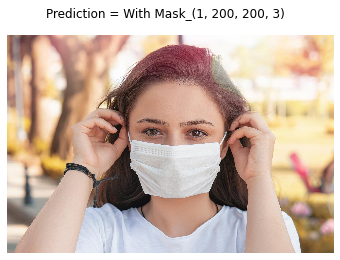

In [58]:
predict_image('./images/example (1).jpg', ENDPOINT)

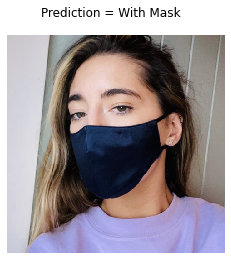

In [56]:
predict_image('./images/example2 (1).png', ENDPOINT)

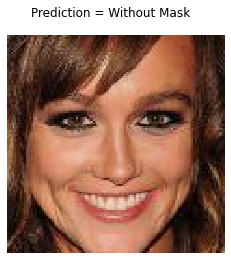

In [190]:
predict_image('./images/example3.png', ENDPOINT)

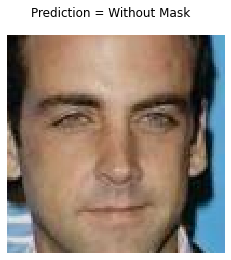

In [194]:
predict_image('./images/example4.png', ENDPOINT)

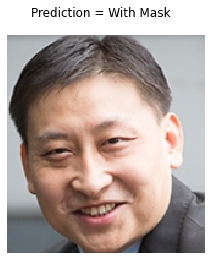

In [192]:
predict_image('./images/dbt2.PNG', ENDPOINT)

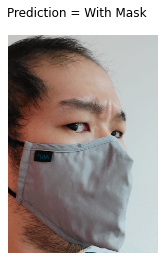

In [195]:
predict_image('./images/drift1.PNG', ENDPOINT)

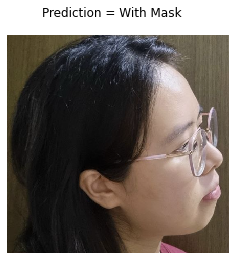

In [197]:
predict_image('./images/drift3.PNG', ENDPOINT)

## For Code Testing

In [189]:
# for testing
endpoint = aip.Endpoint(ENDPOINT)
prediction = endpoint.predict(instances=x_test)
# result = np.argmax(prediction.predictions)
# print(result)
prediction.predictions

[[0.543205619, 0.456794351]]